# Machine Learning Project - Christopher Collins - G00387822

## Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:

*1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.

*2. Python script that runs a web service based on the model, as above.

*3. Dockerfile to build and run the web service in a container.

*4. Standard items in a git repository such as a README.

## Solution

The main solution I used for this project came from Dr Ian McLoughlin's demo of sklearn.linear_model and his demo of seaborn.
The video of Dr Ian McLoughlin's demonstration can be seen here https://web.microsoftstream.com/video/08404c4e-fe8b-4b84-832e-6bee57b5b160 and the notebook relating to the video can be found here https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

Also from a cursory observation of the CSV data, wind speeds below 0.325 and above 24.399 had no energy generated. I could only surmise from this, and from a discussion with someone else about the wind energy industry, is that wind turbines are not moving / turned off if wind speed is to too low or too high. Wind turbines can be turned off to reduce unneccessary wear and tear on machinery when speed is not adequate for producing enough energy or speed is dangerously too high.

_If a wind turbine isn’t turning because it’s too windy, or not windy enough, the owner of the wind turbine does not get paid.
https://www.scottishrenewables.com/news/576-blog-why-that-wind-turbine-isnt-turning

_'Modern wind turbines are designed to shut off or slow their blades during high winds. If the blades turn too fast, it can cause the entire structure to become unstable and then disintegrate.https://www.wind-watch.org/news/2019/02/20/high-winds-topple-turbine/

The solution I made to approximately predict the likely energy output from wind speeds would require a solution that took into account the industry practice of turning the wind turbines off for high speeds and low speeds.

### Building in a control for low and high wind speeds

Not all results from a linear machine learning analysis of the data make sense

**predict_power_output(60)
For example a simple analysis of wind speed of 60 miles an hour would return an energy output of 281.155

We already know from a cursory look of the csv data, that no energy is produced from speeds above 24.399.
**We handle wind speeds above 24.399 with an if statement to return 0 energy output.**

**predict_power_output(2)
Another example of wind speed of 2 miles an hour, a simple analysis would return a negative energy output of -4.064


**We handle wind speeds of below 0.325 with an if statement to return 0 energy output**, as there is no evidence on the CSV file that the wind turbine consumes energy and generates negative energy values for low wind speeds.

The reader might query why the linear machine learning module in Python returns a negative energy value of -4.064 for a wind speed of 2mph, when there is wind speed data as low as 0.325 generating power. Typically turbines are able to generate electricity in winds of about 7mph https://www.scottishrenewables.com/news/576-blog-why-that-wind-turbine-isnt-turning However our CSV data indicates that these turbines can generate power from speeds as low as 0.325

The energy data that the wind turbine produces can be distorted by the fact that the owner of the wind turbine may have chosen to turn the wind turbine off on certain days, this could be for three reasons: 1) They’re being maintained, or need maintenance
2) It’s not windy enough for them to operate at all, or too windy for them to operate 3) There is no demand on the grid for the supply of the energy.

We do not know the reasons why no energy was generated on these windy days where wind speed was above 0.325 To have an accurate machine learning model, you would strip out the days that the wind turbines were turned off for maintenance or because there was no demand for energy, as this data detracts from being able to accurately predict energy than can be produced from wind speed.

speed	power
0.726	0
0.751	0
1.026	0
1.076	0
1.301	0
1.552	0
1.677	0
1.827	0
2.027	0
2.077	0
2.102	0
2.252	0
3.128	0
3.504	0
3.579	0
3.679	0
3.779	0
3.804	0
3.879	0
4.429	0
4.88	0
5.556	0
5.781	0
5.806	0
5.931	0
6.782	0
6.857	0
6.957	0
7.107	0
7.432	0
10.511	0
17.167	0
20.095	0
22.998	0
24.499	0
24.525	0
24.575	0
24.65	0
24.75	0
24.775	0
24.85	0
24.875	0
24.95	0
25	    0

We know for a fact that 2mph winds can generate energy, see speeds between 0.3 and 3 generating energy, yet the above zero days distort the machine learning output

speed	power
0.325	4.331
0.4	    5.186
0.45	3.826
0.501	1.048
0.526	5.553
0.551	6.498
0.576	5.241
0.626	4.22
0.676	7.974
0.701	9.746
0.801	7.271
0.826	0.795
0.851	7.35
0.926	1.996
0.951	1.609
0.976	2.064
1.001	6.511
1.051	2.085
1.101	0.121
1.151	1.208
1.251	3.373
1.276	6.51
1.401	4.156
1.426	2.005
1.502	5.352
1.652	7.221
1.702	2.439
1.877	2.359
1.902	7.048
2.177	2.701
2.227	2.869
2.402	2.287
2.477	6.947
2.553	2.37
2.578	3.165
2.703	0.667
2.828	7.559
2.853	14.131
2.953	2.894

### Visualisation of the data
When Dr McLoughlin was demoing the seaborn sns.regplot method, he demonstrated a great visualisation of the relationship between two variables (penguin flipper length and penguin body mass). As the powerproduction.csv only used two variables, speed and energy, I was able to quickly adapt the code from Dr McLoughlin's example to visualise the relationship between speed and energy.

**Dr McLoughlin's code**


import seaborn as sns

penguins = sns.load_dataset("penguins")

flipper = penguins[["body_mass_g", "flipper_length_mm"]].dropna()
sns.regplot(x="body_mass_g", y="flipper_length_mm", data=penguins)

**My adation of code**

import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')

poweranalysis = powerproduction[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=powerproduction)


_the main adaption I had to make to my code was importing the pandas module so that I could load the csv data for analysis, whereas Dr McLoughlin's code used a dataset called penguins which was already inbuilt into the seaborn module_


This visualisation of the data on a linear graph meant that I could quite quickly see whether the output analysis of the inbuilt methods of sklearn were likely to be correct approximations and not wildly out.

### Linear Regression using sklearn

In [1]:
#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb
#https://stackoverflow.com/questions/30336324/seaborn-load-dataset
#powerproduction
import seaborn as sns
import pandas as pd

# Load a dataset.
powerproduction = pd.read_csv('powerproduction.csv')

#view raw data
print(powerproduction)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


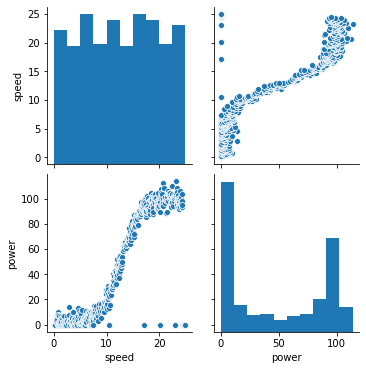

In [2]:
# Pick out two variables.
sns.pairplot(powerproduction)

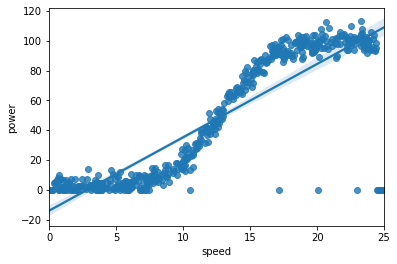

In [3]:
poweranalysis = powerproduction[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=powerproduction)

In [13]:
import sklearn.linear_model as lin

def f(speed, p):
    return p[0] + speed * p[1]

def predict_power_output(speed):
    return f(speed, p)

speed = powerproduction["speed"].to_numpy()
y = powerproduction["power"].to_numpy()

speed = speed.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(speed, y)
r = model.score(speed, y)
p = [model.intercept_, model.coef_[0]]

speed_test = int(input("Enter a wind speed"))

result = predict_power_output(speed_test)

if speed_test > 24.499:
    print("The wind turbine is turned off when wind speeds exceed 24.99")
    end

if speed_test < 0.3:
    print("The wind turbine is turned off when wind speeds are below 0.3")
    end
    
if result <= 0:
    print("Energy generated from wind speed is 0")

if result > 0:
    print(result)

Enter a wind speed56
The wind turbine is turned off when wind speeds exceed 24.99


NameError: name 'end' is not defined

In [5]:
r

0.7289360258564073

In [6]:
p

[-13.89990263051962, 4.917595665404669]

In [7]:
f(10, p)

35.27605402352707

In [17]:
predict_power_output(3)

0.8528843656943863